In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
#plotly is simple syntax and is used to easy visualize of data
from sklearn.metrics import accuracy_score

In [5]:
pyo.init_notebook_mode(connected=True)

In [6]:
df= pd.read_csv('C:/Users/chakr/Downloads/heart.csv')
#read csv file

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
X,y=df.loc[:,:'thal'],df.loc[:,'target']
#x = upto thal value excluding target
#y = target

In [9]:
X.drop('fbs',axis=1,inplace=True)
X.drop('restecg',axis=1,inplace=True)

In [10]:
X

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,150,0,2.3,0,0,1
1,37,1,2,130,250,187,0,3.5,0,0,2
2,41,0,1,130,204,172,0,1.4,2,0,2
3,56,1,1,120,236,178,0,0.8,2,0,2
4,57,0,0,120,354,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,123,1,0.2,1,0,3
299,45,1,3,110,264,132,0,1.2,1,0,3
300,68,1,0,144,193,141,0,3.4,1,2,3
301,57,1,0,130,131,115,1,1.2,1,1,3


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [569]:
X.shape

(303, 11)

In [570]:
#70% for training and 30% for testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [571]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [572]:
X_train.shape

(212, 11)

In [573]:
X_test.shape

(91, 11)

In [574]:
y_train.shape

(212,)

In [575]:
y_test.shape

(91,)

In [576]:
X_train

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,160,0,0.0,2,0,2
171,48,1,1,110,229,168,0,1.0,0,0,3
223,56,0,0,200,288,133,1,4.0,0,2,3
58,34,1,3,118,182,174,0,0.0,2,0,2
154,39,0,2,138,220,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,179,0,0.0,2,0,2
123,54,0,2,108,267,167,0,0.0,2,0,2
15,50,0,2,120,219,158,0,1.6,1,0,2
125,34,0,1,118,210,192,0,0.7,2,0,2


In [577]:
X_train.shape

(212, 11)

In [578]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [579]:
prediction=dt.predict(X_test)

In [580]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [581]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [582]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [583]:
accuracy_dt

76.92307692307693

In [584]:
#feature important find which is more important
dt.feature_importances_

array([0.0396247 , 0.04391232, 0.32392476, 0.094626  , 0.077462  ,
       0.09217349, 0.04724994, 0.08509998, 0.07645805, 0.10975468,
       0.00971408])

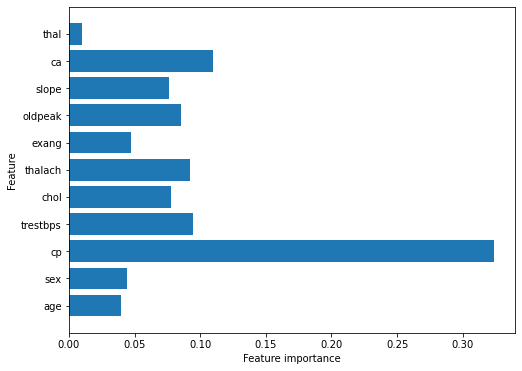

In [586]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 11
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [587]:
Category=['No you dont have heart disease','Yes you have heart disease']

In [589]:
X

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,150,0,2.3,0,0,1
1,37,1,2,130,250,187,0,3.5,0,0,2
2,41,0,1,130,204,172,0,1.4,2,0,2
3,56,1,1,120,236,178,0,0.8,2,0,2
4,57,0,0,120,354,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,123,1,0.2,1,0,3
299,45,1,3,110,264,132,0,1.2,1,0,3
300,68,1,0,144,193,141,0,3.4,1,2,3
301,57,1,0,130,131,115,1,1.2,1,1,3


In [590]:
#test the model is predicting right or not
X_DT=np.array([[63,1,3,145,233,150,0,2.3,0,0,1]])
X_DT_prediction=dt.predict(X_DT)

In [591]:
X_DT_prediction

array([1], dtype=int64)

In [592]:
print(Category[int(X_DT_prediction)])

Yes you have heart disease
